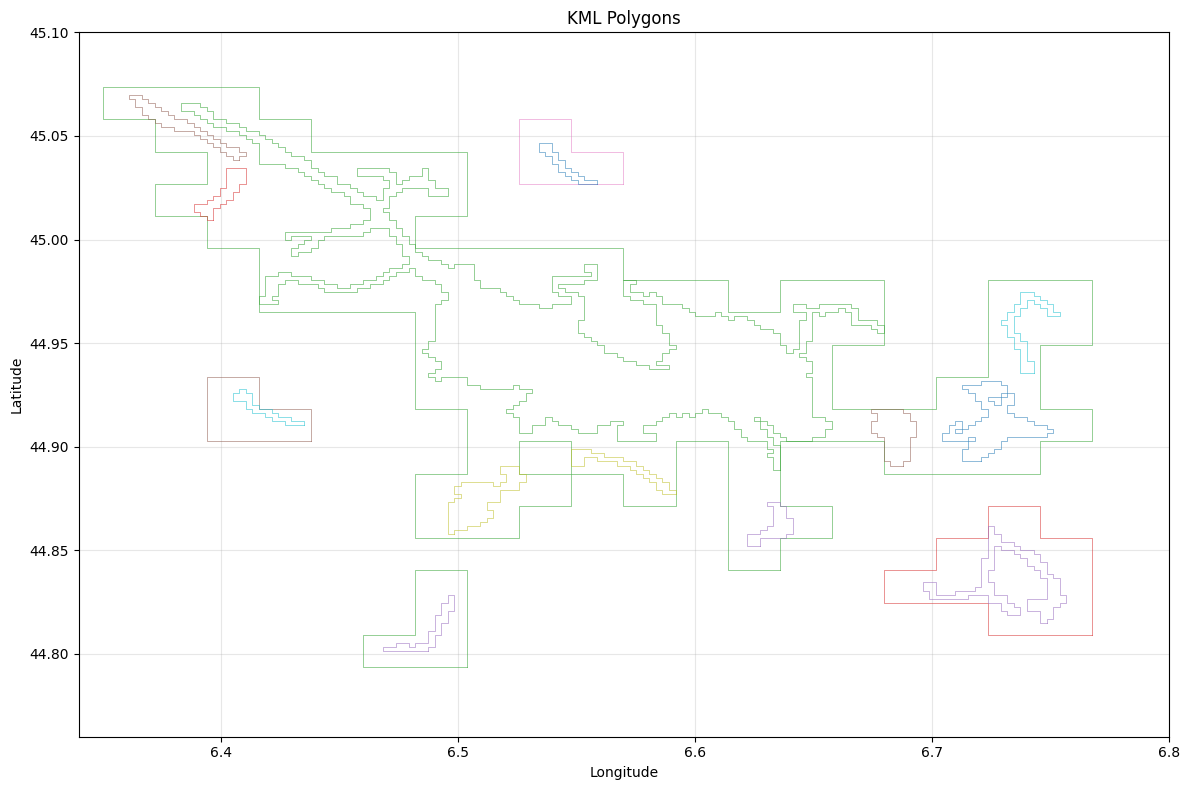

In [20]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import numpy as np

# Parse the KML file
kml_file_path = '/Users/epauthen/Documents/Database/squadrats-2025-11-03.kml'
tree = ET.parse(kml_file_path)
root = tree.getroot()

# Define KML namespace
ns = {'kml': 'http://www.opengis.net/kml/2.2'}

# Create figure
fig, ax = plt.subplots(figsize=(12, 8))

# Find all Polygon elements
for placemark in root.findall('.//kml:Placemark', ns):
    name = placemark.find('.//kml:n', ns)
    name_text = name.text if name is not None else 'Unknown'
    
    # Find all polygons in this placemark
    for polygon in placemark.findall('.//kml:Polygon', ns):
        # Get outer boundary coordinates
        outer = polygon.find('.//kml:outerBoundaryIs//kml:coordinates', ns)
        if outer is not None:
            coords_text = outer.text.strip()
            coords = [list(map(float, point.split(','))) for point in coords_text.split()]
            
            # Extract lon, lat
            lons = [c[0] for c in coords]
            lats = [c[1] for c in coords]
            
            # Plot the polygon
            ax.plot(lons, lats, linewidth=0.5, alpha=0.7)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('KML Polygons')
ax.grid(True, alpha=0.3)
lon_min=6.34
lon_max=6.8
lat_min=44.76
lat_max=45.1
ax.set_xlim([lon_min, lon_max])
ax.set_ylim([lat_min, lat_max])


plt.tight_layout()
plt.savefig('figure/kml_plot.png', dpi=150)
plt.show()